In [49]:
import pandas as pd
import numpy as np
import time

In [62]:
def read_tsp(size):
    if(size == 10):
        f = open('TSP10cities.tsp')
    if(size == 100):
        f = open('TSP100cities.tsp')
    cities = pd.read_csv(
        f,
        sep=' ',
        names=['city', 'x', 'y'],
        dtype={'city': int, 'x': np.float64, 'y': np.float64}
    )
    return cities

#归一化
def normalize(points):
    ratio = (points.x.max() - points.x.min()) / (points.y.max() - points.y.min()), 1
    ratio = np.array(ratio) / max(ratio)
    norm = points.apply(lambda c: (c - c.min()) / (c.max() - c.min()))
    return norm.apply(lambda p: ratio * p, axis=1)

In [52]:
def select_closest(candidates, origin):
    return euclidean_distance(candidates, origin).argmin()

def euclidean_distance(a, b):
    return np.linalg.norm(a - b, axis=1)

def route_distance(cities):
    points = cities[['x', 'y']]
    distances = euclidean_distance(points, np.roll(points, 1, axis=0))
    return np.sum(distances)

In [53]:
def generate_network(size):
    return np.random.rand(size, 2)

def get_neighborhood(center, radix, domain):
    if radix < 1:
        radix = 1
    deltas = np.absolute(center - np.arange(domain))
    distances = np.minimum(deltas, domain - deltas)
    return np.exp(-(distances*distances) / (2*(radix*radix)))

def get_route(cities, network):
    cities['winner'] = cities[['x', 'y']].apply(
        lambda c: select_closest(network, c),
        axis=1, raw=True)
    return cities.sort_values('winner').index

In [99]:
def kohNN(data, iterations, learning_rate=0.8):
    cities = data.copy()
    cities[['x', 'y']] = normalize(cities[['x', 'y']])
    n = cities.shape[0] * 8
    network = generate_network(n)
    print('网络具有{}个神经元'.format(n))

    for i in range(iterations):
        if not i % 100:
            print('第{}次迭代'.format(i, iterations), end="\r")
        city = cities.sample(1)[['x', 'y']].values
        winner_idx = select_closest(network, city)
        gaussian = get_neighborhood(winner_idx, n//10, network.shape[0])
        network += gaussian[:,np.newaxis] * learning_rate * (city - network)
        route_tmp = get_route(cities, network)
        data = data.reindex(route_tmp)
        d = route_distance(data)
        iter_record.append(i)
        dist_record.append(d)
        #衰减
        learning_rate = learning_rate * 0.99997
        n = n * 0.9997
        if n < 1:
            print('领域衰减完成于第{}次迭代'.format(i))
            break
        if learning_rate < 0.001:
            print('学习率衰减完成于第{}次迭代'.format(i))
            break
    else:
        print('共进行{}次迭代'.format(iterations))
    route = get_route(cities, network)

    return route

问题规模为n = 10

In [100]:
iter_record = []
dist_record = []
data = read_tsp(10)
start = time.clock()
route = kohNN(data, 100000)
end = time.clock()

网络具有80个神经元
领域衰减完成于第14604次迭代


In [101]:
print("经过{}次迭代，获得的总距离为：{}".format(iter_record[-1], dist_record[-1]))
print("到收敛时经过时间为：{}".format(end - start));
print("遍历城市顺序为：{}".format(list(route)))

经过14604次迭代，获得的总距离为：10127.552143541277
到收敛时经过时间为：66.95210598289805
遍历城市顺序为：[5, 8, 9, 0, 4, 6, 7, 1, 3, 2]


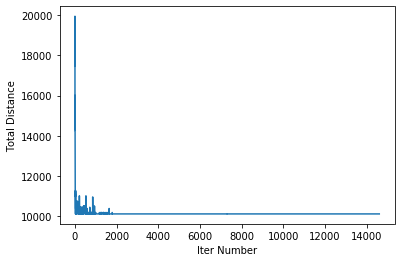

In [104]:
plt.plot(iter_record, dist_record);
plt.xlabel("Iter Number");
plt.ylabel("Total Distance");

问题规模为n = 100

In [91]:
iter_record = []
dist_record = []
data = read_tsp(100)
start = time.clock()
route = kohNN(data, 100000)
end = time.clock()

网络具有800个神经元
领域衰减完成于第22278次迭代


In [92]:
print("经过{}次迭代，获得的总距离为：{}".format(iter_record[-1], dist_record[-1]))
print("到收敛时经过时间为：{}".format(end - start));
print("遍历城市顺序为：{}".format(list(route)))

经过22278次迭代，获得的总距离为：24864.187826530295
到收敛时经过时间为：165.68145885193167
遍历城市顺序为：[4, 89, 11, 98, 94, 62, 56, 12, 65, 78, 66, 49, 51, 39, 54, 9, 30, 57, 35, 29, 27, 77, 76, 71, 70, 59, 46, 1, 33, 88, 86, 53, 60, 83, 14, 48, 20, 26, 96, 91, 84, 19, 69, 34, 7, 55, 24, 37, 41, 47, 3, 43, 99, 79, 42, 63, 44, 50, 64, 38, 74, 25, 87, 52, 68, 16, 61, 32, 17, 92, 45, 23, 0, 21, 72, 97, 80, 67, 93, 73, 95, 28, 22, 58, 82, 15, 13, 8, 90, 75, 10, 85, 18, 2, 6, 40, 31, 36, 81, 5]


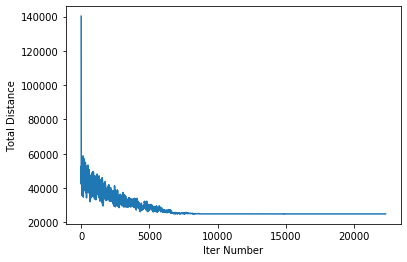

In [93]:
plt.plot(iter_record, dist_record);
plt.xlabel("Iter Number");
plt.ylabel("Total Distance");